In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [3]:
df = pd.read_table("D:/Thinkful/ICPSR_35478/DS0001/35478-0001-Data.tsv")
df.head()

,YEAR,ID,INTID,FEEUSED,FEELEVEL,DATEINTV,LNGTHINV,INTAGE,INTETHN,MODE,...,SAMPCODE,SAMPLE,OVERSAMP,WTSS,WTSSNR,WTSSALL,WTCOMB,WTCOMBNR,VSTRAT,VPSU
0,2012,1,49,1,75,721,69,60,1,1,...,601,10,1,2.621963,2.869532,2.621963,6.402159,7.006659,-1,-1
1,2012,2,150,1,75,624,53,32,1,1,...,601,10,1,3.495950,3.826043,3.495950,6.514477,7.129583,-1,-1
2,2012,3,150,1,75,627,77,32,1,1,...,601,10,1,1.747975,1.913021,1.747975,1.671130,1.828920,-1,-1
3,2012,4,49,1,20,527,78,60,1,1,...,601,10,1,1.235694,1.352370,1.235694,1.181370,1.292917,-1,-1
4,2012,5,235,1,75,620,149,62,1,1,...,601,10,1,0.873988,0.956511,0.873988,0.835565,0.914460,-1,-1


In [4]:
columns = ['YEAR', 'ID', 'AGE',
    'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM', 'SELFLESS', 'ACCPTOTH', 'OTHSHELP', 
    'CARESELF', 'PEOPTRBL', 'SELFFRST', 'VOLMONTH', 
    'MAWRKSLF', 'MAOCC10', 'MAIND10',
    'SIBS', 'CHILDS',
    'PAOCC10', 'PAWRKSLF', 'PAIND10', 
    'RINCOME', 'RINCOM06', 'REALRINC']
df_int = df[columns]

(array([ 12.,  20.,  23.,  47.,  50.,  70.,  63.,  74.,  65.,  87.,  82.,
         75.,  98.,  94.,  94.,  97.,  78.,  85.,  72.,  95.,  84.,  99.,
         78.,  98.,  89.,  82.,  75.,  84.,  86.,  81.,  88.,  92.,  81.,
        113.,  97.,  85., 101., 104.,  79.,  89.,  92.,  77.,  90.,  95.,
         77.,  69.,  90.,  86.,  53.,  65.,  54.,  76.,  57.,  67.,  49.,
         49.,  41.,  34.,  37.,  33.,  41.,  30.,  27.,  23.,  31.,  19.,
         31.,  19.,  18.,  15.,  15.,  43.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  51.]),
 array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 81 Patch objects>)

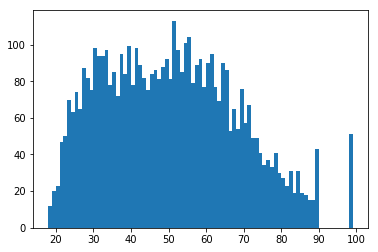

In [5]:
plt.hist(df_int['AGE'],bins=np.arange(18,100))

In [6]:
df_int = df_int[(df_int['AGE'] >= 18) & (df_int['AGE'] <= 66)]
age_bins = pd.cut(df_int['AGE'],
                  [18, 26, 34, 42, 50, 58, 66], 
                  include_lowest=True)
df_int = df_int.assign(AGEBIN = age_bins)

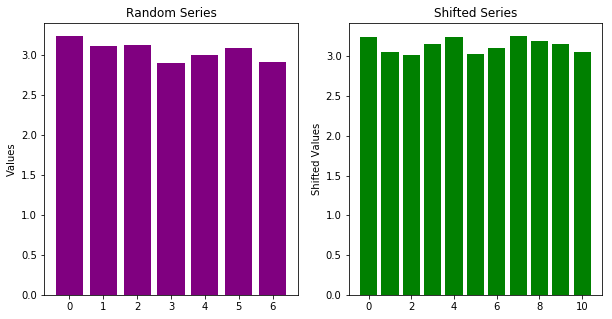

In [7]:
rows_accptoth = df_int[(df_int['ACCPTOTH'] >= 1) & (df_int['ACCPTOTH'] <= 6)]
rows_accptoth['ACCPTOTH'].value_counts().sort_index()
rows_accptoth_sibs = rows_accptoth[(rows_accptoth['SIBS'] <= 10)]

means_childs_accpt = rows_accptoth_sibs.groupby('CHILDS').mean()['ACCPTOTH'][[0,1,2,3,4,5,6]]
means_sibs_accpt = rows_accptoth_sibs.groupby('SIBS').mean()['ACCPTOTH']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(means_childs_accpt.index, means_childs_accpt.values, color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.bar(means_sibs_accpt.index, means_sibs_accpt.values, color='green')
plt.ylabel('Shifted Values')
plt.title('Shifted Series')
plt.show()

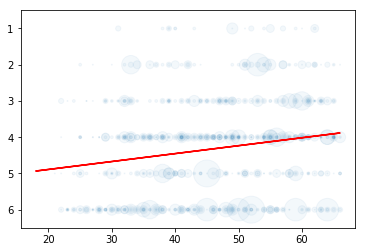

In [8]:
s_rows_givchrty = df_int[(df_int['GIVCHRTY'] >= 1) & (df_int['GIVCHRTY'] <= 6)]
plt.scatter(s_rows_givchrty['AGE'], s_rows_givchrty['GIVCHRTY'], s=s_rows_givchrty['CHILDS']**3, alpha=.05)
plt.ylim(6.5,0.5)
# http://matthiaseisen.com/pp/patterns/p0170/
fit = np.polyfit(s_rows_givchrty['AGE'], s_rows_givchrty['GIVCHRTY'], deg=1)
plt.plot(s_rows_givchrty['AGE'], fit[0] * s_rows_givchrty['AGE'] + fit[1],color='red')

In [11]:
actions_cols = ['GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']

df_int = df_int.assign(present=df_int[actions_cols].apply(lambda x: (x >= 1) & (x <= 6)).apply(lambda x: x.all(), axis=1))

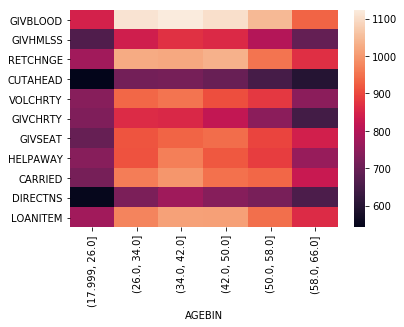

In [12]:
df_actions = df_int[df_int['present']]
actions_cols = ['AGEBIN', 'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']
sns.heatmap(df_actions[actions_cols].groupby('AGEBIN').sum().transpose())

Self-employed 1
Someone else 2

Strongly agree 1
Agree 2
Neither agree nor disagree 3
Disagree 4
Strongly disagree 5

MAWRKSLF
PAWRKSLF

OTHSHELP - PEOPLE SHOULD HELP LESS FORTUNATE OTHERS 
CARESELF - THOSE IN NEED HAVE TO TAKE CARE OF THEMSELVES 

In [16]:
values_cols = ['OTHSHELP', 'CARESELF']

df_int = df_int.assign(values_present=df_int[values_cols].apply(lambda x: (x >= 1) & (x <= 5)).apply(lambda x: x.all(), axis=1))

parent_work = ['MAWRKSLF', 'PAWRKSLF']
df_int = df_int.assign(work_self_present=df_int[parent_work].apply(lambda x: (x >= 1) & (x <= 2)).apply(lambda x: x.all(), axis=1))
df_values = df_int[df_int['work_self_present'] & df_int['values_present']]

In [20]:
df_values = df_values.assign(both_pa_wrk=df_values['MAWRKSLF'] + df_values['PAWRKSLF'])
df_values.head()

,YEAR,ID,AGE,GIVBLOOD,GIVHMLSS,RETCHNGE,CUTAHEAD,VOLCHRTY,GIVCHRTY,GIVSEAT,...,PAWRKSLF,PAIND10,RINCOME,RINCOM06,REALRINC,AGEBIN,present,values_present,work_self_present,both_pa_wrk
5,2012,6,50,6,3,6,3,6,4,6,...,2,9470,0,0,0.0,"(42.0, 50.0]",True,True,True,4
9,2012,10,28,6,5,6,3,4,4,5,...,2,8180,12,16,15925.0,"(26.0, 34.0]",True,True,True,4
13,2012,14,59,6,3,6,5,1,3,5,...,2,770,0,0,0.0,"(58.0, 66.0]",True,True,True,4
15,2012,16,35,6,3,6,4,5,4,5,...,2,9480,12,19,26950.0,"(34.0, 42.0]",True,True,True,4
21,2012,22,39,6,1,5,6,5,3,6,...,2,2280,0,0,0.0,"(34.0, 42.0]",True,True,True,4


In [22]:
df_values[['MAWRKSLF', 'PAWRKSLF', 'OTHSHELP', 'CARESELF', 'both_pa_wrk']].apply(lambda x: x.value_counts())

,MAWRKSLF,PAWRKSLF,OTHSHELP,CARESELF,both_pa_wrk
1,79.0,130.0,236,68,NaN
2,541.0,490.0,333,265,30.0
3,NaN,NaN,44,165,149.0
4,NaN,NaN,6,110,441.0
5,NaN,NaN,1,12,NaN


In [78]:
df_values.groupby('both_pa_wrk').mean()[['CARESELF', 'OTHSHELP']]

,CARESELF,OTHSHELP
both_pa_wrk,,
2,2.533333,1.633333
3,2.563758,1.657718
4,2.573696,1.739229


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

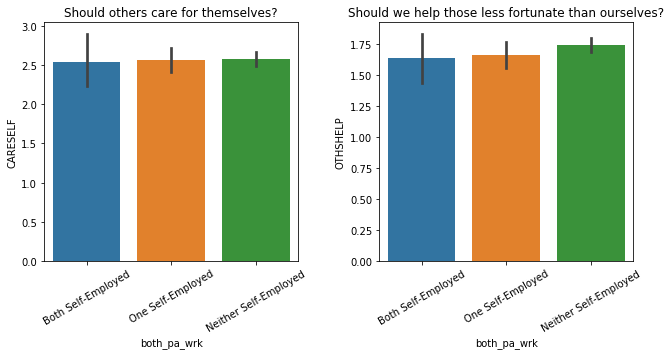

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.tight_layout(pad=5)

labels = ["Both Self-Employed", "One Self-Employed", "Neither Self-Employed"]

plt.subplot(1,2,1)
bar_1 = sns.barplot(x="both_pa_wrk", y="CARESELF", data=df_values) \
   .set_title("Should others care for themselves?")
bar_1.axes.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.subplot(1,2,2)
bar_2 = sns.barplot(x="both_pa_wrk", y="OTHSHELP", data=df_values) \
   .set_title("Should we help those less fortunate than ourselves?")
bar_2.axes.set_xticklabels(labels)
plt.xticks(rotation=30)